In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy import stats

plt.style.use('ggplot')

In [4]:
class Normal(object):

    def __init__(self, mu, sigma):
        self._mu = mu
        self._sigma = sigma

    def sample(self, n):
        return rnd.normal(loc=self._mu, scale=self._sigma, size=n)

    def pdf(self, t):
        return stats.norm.pdf(t, loc=self._mu, scale=self._sigma)

    def cdf(self, t):
        return stats.norm.cdf(t, loc=self._mu, scale=self._sigma)

    def percentile(self, t):
        return stats.norm.ppf(t, loc=self._mu, scale=self._sigma)

In [8]:
data = rnd.normal(loc=0.1, scale=0.7, size=50)
print(data)

[ 0.01885346  0.21294081  0.83196132  0.03375251 -0.30604203 -0.23217622
  0.41525526 -0.29887376  0.59122474 -0.32145818  0.34403244 -0.19506581
  0.162945   -0.08428016 -0.84300529 -1.20911943  0.57604079  0.54469934
 -0.38346608 -0.99128395  0.77745677  0.85755092 -0.24830864  0.24079589
  0.64208595  0.1744505  -0.6519688   0.29471389 -0.4213461   1.09083807
  0.16196474  0.11064565  0.143794   -0.20574536  0.00308313  0.37430804
  0.81312514  0.65615077 -0.336605   -0.37483016  2.11268417  0.99948614
  0.39460629  0.56166935  1.00509879  0.14337153 -0.85083574  1.03930385
 -0.73425711  0.01809921]


(-1, 1)

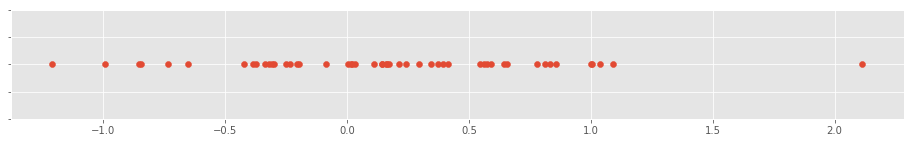

In [9]:
fig, ax = plt.subplots(1, figsize=(16, 2))
ax.scatter(data, np.zeros(data.shape))
ax.yaxis.set_ticklabels([])
ax.set_ylim([-1, 1])

(-1, 1)

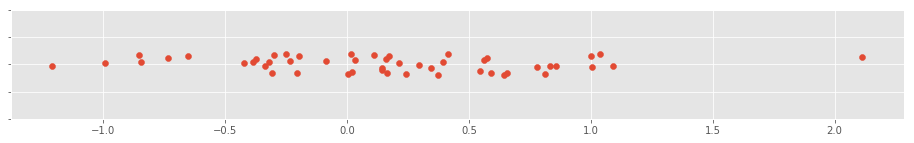

In [11]:
fig, ax = plt.subplots(1, figsize=(16, 2))
jitter = np.random.uniform(-0.2, 0.2, size=data.shape)
ax.scatter(data, jitter)
ax.yaxis.set_ticklabels([])
ax.set_ylim([-1, 1])

[]

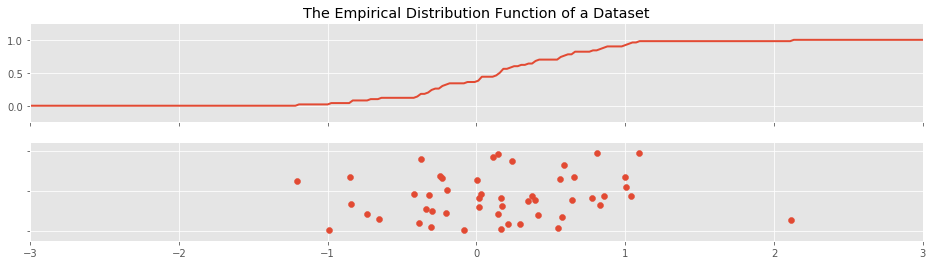

In [26]:
def emperical_distribution(x, data):
    weight = 1.0 / len(data)
    count = np.zeros(shape=len(x))
    for datum in data:
        count = count + np.array(x >= datum)
    return weight * count

fig, ax = plt.subplots(2, 1, figsize=(16, 4), sharex=True)
x = np.linspace(-3, 3, num=250)

ax[0].plot(x, emperical_distribution(x, data), linewidth=2)
ax[0].set_ylim(-0.25, 1.25)
ax[0].set_xlim(-3, 3)
ax[0].set_title("The Empirical Distribution Function of a Dataset")
ax[1].scatter(data, jitter)
ax[1].yaxis.set_ticklabels([])

Text(0.5,1,'Distributions in the Unknown Mean Known Varaince Model')

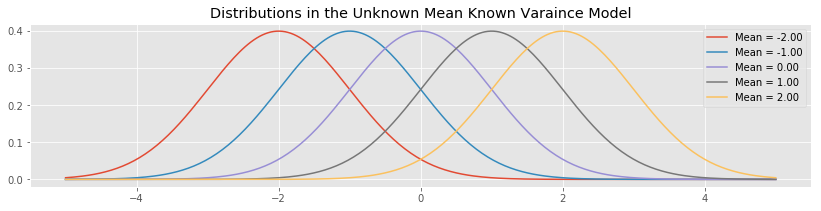

In [17]:
x = np.linspace(-5, 5, num=250)
fig, ax = plt.subplots(figsize=(14, 3))

means = np.linspace(-2, 2, num=5)
for mean in means:
    normal = Normal(mean, 1)
    ax.plot(x, stats.norm.pdf(x, loc=mean, scale=1), label="Mean = {:2.2f}".format(mean))

ax.legend()
ax.set_title("Distributions in the Unknown Mean Known Varaince Model")

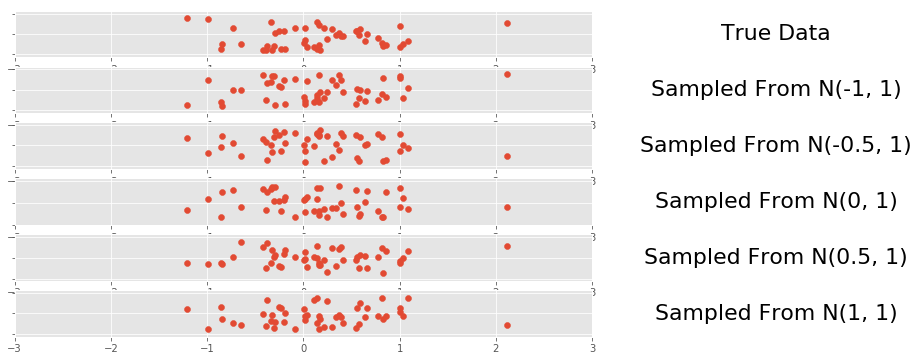

In [25]:
def text_in_blank_plot(text, ax):
    _ = ax.text(0.5, 0.5, text, horizontalalignment='center', verticalalignment='center', fontsize=22)
    ax.axis('off')
    
means = [-1, -0.5, 0, 0.5, 1]

fig = plt.figure(figsize=(16, 6))
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
jitter = np.random.uniform(-0.2, 0.2, size=data.shape)
ax.scatter(data, jitter)
ax.yaxis.set_ticklabels([])
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("True Data", ax)

for i, mu in enumerate(means):
    sample = rnd.normal(loc=mu, scale=1, size=50)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)  
    jitter = np.random.uniform(-0.2, 0.2, size=data.shape)
    ax.scatter(data, jitter)
    ax.yaxis.set_ticklabels([])
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Sampled From N({}, 1)".format(mu), ax)